In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib
import scipy as sp
import sklearn
import itertools

import random
import time

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.cm as cm
import seaborn as sns
from imblearn.over_sampling import ADASYN

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/iris.csv')


In [4]:
df2 = df

In [5]:
df2.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
df2["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [7]:
df2.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [8]:
df2.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df2.isna().sum()


sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [10]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
X = df2.drop(["variety"], axis=1)
y = df2["variety"]

In [12]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Standardizing the features
X = scaler.fit_transform(X)
X2 = scaler.fit_transform(X)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X2)

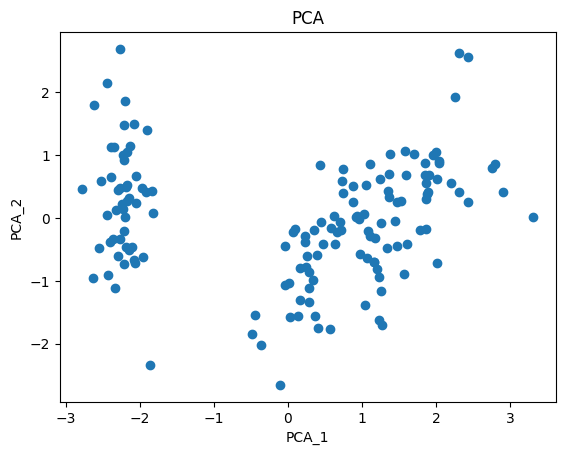

In [16]:
x = [row[0] for row in principalComponents]
z = [row[1] for row in principalComponents]

plt.scatter(x, z)
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.title("PCA")
plt.show()

In [17]:
kmeans2 = KMeans(n_clusters = 3, random_state = 42)
labels = kmeans2.fit(principalComponents)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [18]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [19]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [20]:
cluster1 = df2[kmeans.labels_==0]
cluster2 = df2[kmeans.labels_==1]
cluster3 = df2[kmeans.labels_==2]

In [21]:
cluster1.describe()


,sepal.length,sepal.width,petal.length,petal.width
count,47.000000,47.000000,47.000000,47.000000
mean,6.780851,3.095745,5.510638,1.972340
std,0.490624,0.262063,0.638011,0.330811
min,5.900000,2.500000,4.400000,1.400000
25%,6.400000,3.000000,5.050000,1.800000
50%,6.700000,3.100000,5.600000,2.000000
75%,7.050000,3.200000,5.900000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [22]:
cluster2.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [23]:
cluster3.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,53.000000,53.000000,53.000000,53.000000
mean,5.801887,2.673585,4.369811,1.413208
std,0.405487,0.254310,0.560420,0.311348
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.500000,4.000000,1.200000
50%,5.800000,2.700000,4.400000,1.300000
75%,6.100000,2.900000,4.800000,1.500000
max,6.600000,3.000000,5.600000,2.400000


In [24]:
 pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21166 sha256=9a95824aea0af5083f1e198fce51cf86305ea0b5d2bc7ebdfbc162fa04159ad3
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


In [26]:
df2['cluster'] = kmeans.labels_

In [28]:
kmeans_clusters = np.unique(kmeans.labels_)
dic2 = {}

for i in kmeans_clusters:
    cluster_varieties = df['variety'].iloc[np.where(kmeans.labels_ == i)]
    unique_varieties, counts = np.unique(cluster_varieties, return_counts=True)
    max_count_index = np.argmax(counts)
    dic2[i] = unique_varieties[max_count_index]

dic2

{0: 'Virginica', 1: 'Setosa', 2: 'Versicolor'}

In [29]:
df2['labels'] = df2['cluster'].map(dic2)
df2

,sepal.length,sepal.width,petal.length,petal.width,variety,cluster,labels
0,5.1,3.5,1.4,0.2,Setosa,1,Setosa
1,4.9,3.0,1.4,0.2,Setosa,1,Setosa
2,4.7,3.2,1.3,0.2,Setosa,1,Setosa
3,4.6,3.1,1.5,0.2,Setosa,1,Setosa
4,5.0,3.6,1.4,0.2,Setosa,1,Setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,0,Virginica
146,6.3,2.5,5.0,1.9,Virginica,2,Versicolor
147,6.5,3.0,5.2,2.0,Virginica,0,Virginica
148,6.2,3.4,5.4,2.3,Virginica,0,Virginica


In [30]:
correct = 0
for i in range(len(df2)):
    if df2['labels'][i] == df2['variety'][i]:
        correct += 1

In [32]:
print('accuracy: ', correct / len(df2))
print('correct predictions: ', correct)
print('wrong predictions: ', len(df2) - correct)

accuracy:  0.8333333333333334
correct predictions:  125
wrong predictions:  25


In [33]:
setosa_correct = 0
setosa_wrong = 0
versicolor_correct = 0
versicolor_wrong = 0
virginica_correct = 0
virginica_wrong = 0

for i in range(len(df2)):
    if df2['variety'][i] == 'Setosa':
        if df2['labels'][i] == 'Setosa':
            setosa_correct += 1
        else:
            setosa_wrong += 1
    elif df2['variety'][i] == 'Versicolor':
        if df2['labels'][i] == 'Versicolor':
            versicolor_correct += 1
        else:
            versicolor_wrong += 1
    elif df2['variety'][i] == 'Virginica':
        if df2['labels'][i] == 'Virginica':
            virginica_correct += 1
        else:
            virginica_wrong += 1

In [34]:
print('------------------------------------')
print('Setosa correct: ', setosa_correct)
print('Setosa wrong: ', setosa_wrong)
print('------------------------------------')
print('Versicolor correct: ', versicolor_correct)
print('Versicolor wrong: ', versicolor_wrong)
print('------------------------------------')
print('Virginica correct: ', virginica_correct)
print('Virginica wrong: ', virginica_wrong)

------------------------------------
Setosa correct:  50
Setosa wrong:  0
------------------------------------
Versicolor correct:  39
Versicolor wrong:  11
------------------------------------
Virginica correct:  36
Virginica wrong:  14


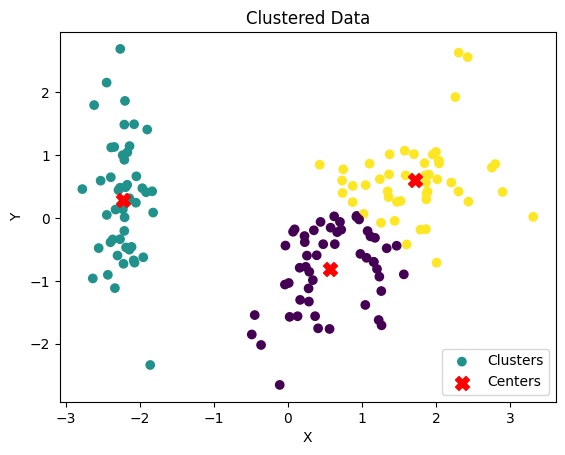

In [41]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import mplcursors
from sklearn.cluster import KMeans

labels2 = kmeans2.labels_

centers2 = kmeans2.cluster_centers_

df4_2 = pd.DataFrame({'x': principalComponents[:, 0], 'y': principalComponents[:, 1], 'labels in K-Means': labels2, 'variety': y})

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=labels2, cmap='viridis', label='Clusters')

plt.scatter(centers2[:, 0], centers2[:, 1], marker='X', color='red', s=100, label='Centers')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustered Data')
plt.legend()
plt.show()

fig.show()

In [45]:
df4_2

,x,y,labels in K-Means,variety
0,-2.264703,0.480027,1,Setosa
1,-2.080961,-0.674134,1,Setosa
2,-2.364229,-0.341908,1,Setosa
3,-2.299384,-0.597395,1,Setosa
4,-2.389842,0.646835,1,Setosa
...,...,...,...,...
145,1.870503,0.386966,2,Virginica
146,1.564580,-0.896687,0,Virginica
147,1.521170,0.269069,2,Virginica
148,1.372788,1.011254,2,Virginica


In [46]:
len(cluster1), len(cluster2), len(cluster3)


(47, 50, 53)

In [47]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=df2["variety"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
variety,
Setosa,50
Versicolor,50
Virginica,50
